In [1]:
import numpy as np
import pandas as pd
from BenchmarkDataset import *
from animate_path import animate_path_positions
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from TKM import TKM
from perform_clustering import read_data, perform_clustering, k_means, dbscan

In [62]:
swarm_1_params = PyswarmParameters(cognitive_param=0.5, social_param=0.3, inertia=.93, n_particles=20,
                                  iters=100, trajectory_vector = [1,0], start_point = [1,0])

swarm_2_params = PyswarmParameters(cognitive_param=0.3, social_param=0.1, inertia=.92, n_particles=30,
                                  iters=100, trajectory_vector = [-1,3], start_point = [1,0])


swarm_3_params = PyswarmParameters(cognitive_param=0.1, social_param=0.5, inertia=.93, n_particles=10,
                                  iters=100, trajectory_vector = [-1,1], start_point = [0,0])


BD = BenchmarkDataset([swarm_1_params, swarm_2_params, swarm_3_params])
BD.create_moving_swarms()
BD.create_swarm_df()

2022-02-11 08:05:11,683 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.93}
pyswarms.single.global_best: 100%|███████████████████████████████████████|100/100, best_cost=4.03e-6
2022-02-11 08:05:11,818 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.031701597354127e-06, best pos: [0.00199019 0.00026619]
2022-02-11 08:05:11,833 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.3, 'c2': 0.1, 'w': 0.92}
pyswarms.single.global_best: 100%|███████████████████████████████████████|100/100, best_cost=2.98e-7
2022-02-11 08:05:11,971 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.983206190549724e-07, best pos: [-0.00023262  0.00049417]
2022-02-11 08:05:11,981 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.1, 'c2': 0.5, 'w': 0.93}
pyswarms.single.global_best: 100%|███████████████████████████████████████|100/100, best_cost=9.87e-6
2022-02-11

2022-02-11 08:05:12,523 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


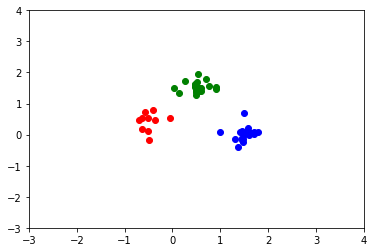

In [63]:
animate_path_positions(BD.swarm_list, anim_frames = 50, anim_interval = 100, colors = ['b', 'g', 'r'])

In [64]:
from TKM import TKM

In [65]:
data = np.transpose(np.hstack((np.hstack((np.array(BD.swarm_list[0]), 
                                          np.array(BD.swarm_list[1]))), 
                               np.array(BD.swarm_list[2]))), axes = [0,2,1])

t,m,n = data.shape

true_labels = []

for i in range(len(BD.swarm_list)):
    num_members = np.array(BD.swarm_list[i]).shape[1]
    true_labels += [i]*num_members
    


In [66]:
tkm = TKM(data[:50])
tkm.perform_clustering(k=3, lam=0.60, max_iter = 5000)
# tkm.perform_clustering_center_derivative(k=2, lam = 0.80, gamma = 0.50, max_iter = 10000)
# tkm.perform_clustering_constant_weights(k=3, lam = .80)
# plt.figure()


2022-02-11 08:05:31,687 - matplotlib.backends.backend_ps - WARNING - The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


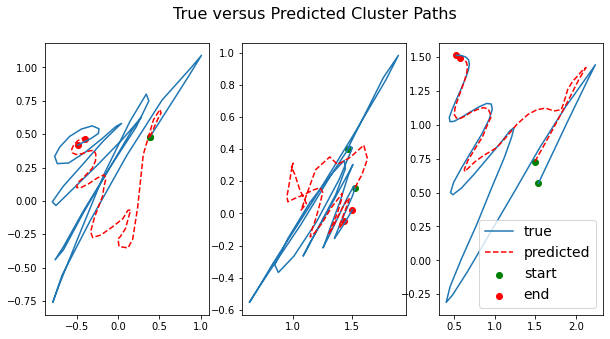

In [68]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = [10,5])
swarm = BD.swarm_list[2][:50]
swarm_mean = np.average(swarm, axis = 1)
ax1.scatter(swarm_mean[0,0], swarm_mean[0,1], c = 'g')
ax1.scatter(swarm_mean[-1,0], swarm_mean[-1,1], c = 'r')
ax1.plot(swarm_mean[:,0], swarm_mean[:,1], label = 'true')
ax1.plot(tkm.centers[:, 0, 0], tkm.centers[:,1,0], 'r--')
ax1.scatter(tkm.centers[0,0,0], tkm.centers[0,1,0], c = 'g')
ax1.scatter(tkm.centers[-1,0,0], tkm.centers[-1,1,0], c = 'r')

swarm = BD.swarm_list[0][:50]
swarm_mean = np.average(swarm, axis = 1)
ax2.scatter(swarm_mean[0,0], swarm_mean[0,1], c = 'g')
ax2.scatter(swarm_mean[-1,0], swarm_mean[-1,1], c = 'r')
ax2.plot(swarm_mean[:,0], swarm_mean[:,1], label = 'true')

ax2.plot(tkm.centers[:, 0, 1], tkm.centers[:,1,1], 'r--')
ax2.scatter(tkm.centers[0,0,1], tkm.centers[0,1,1], c = 'g')
ax2.scatter(tkm.centers[-1,0,1], tkm.centers[-1,1,1], c = 'r')

swarm = BD.swarm_list[1][:50]
swarm_mean = np.average(swarm, axis = 1)
ax3.scatter(swarm_mean[0,0], swarm_mean[0,1], c = 'g')
ax3.scatter(swarm_mean[-1,0], swarm_mean[-1,1], c = 'r')
ax3.plot(swarm_mean[:,0], swarm_mean[:,1], label = 'true')

ax3.plot(tkm.centers[:, 0, 2], tkm.centers[:,1,2], 'r--', label = 'predicted')
ax3.scatter(tkm.centers[0,0,2], tkm.centers[0,1,2], c = 'g', label = 'start')
ax3.scatter(tkm.centers[-1,0,2], tkm.centers[-1,1,2], c = 'r', label = 'end')

plt.legend(fontsize = 14)
plt.suptitle('True versus Predicted Cluster Paths', fontsize = 16)
plt.savefig('truevpredicted.eps', format='eps')


In [26]:
tkm.weights.shape

(50, 60, 3)

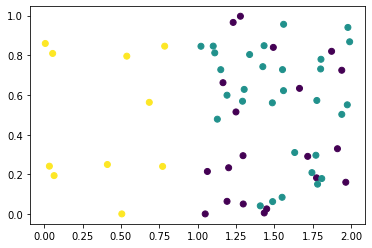

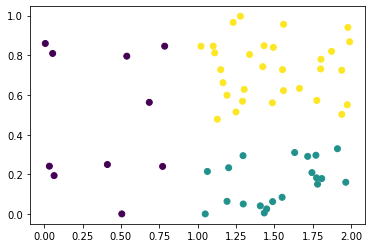

In [69]:
assignments = np.argmax(tkm.weights, axis = 2)
plt.figure()
plt.scatter(data[0,0,:], data[0,1,:], c = np.array(true_labels))
plt.figure()
plt.scatter(data[0,0,:], data[0,1,:], c = assignments[0,:])



In [82]:
assignments = np.argmax(tkm.weights, axis = 2).T


In [91]:
print(true_labels, '\n\n', assignments[:,-1])

##0 -> 2
# 2 -> 1
#1->0

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] 

 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]


In [92]:
assignments2 = np.where(assignments == 0, 4, assignments)
assignments2 = np.where(assignments2 == 2, 5, assignments2)
assignments2 = np.where(assignments2==4, 2, assignments2)
assignments2 = np.where(assignments2==1, 0, assignments2)
assignments2 = np.where(assignments2==5, 1, assignments2)



<Figure size 432x288 with 0 Axes>

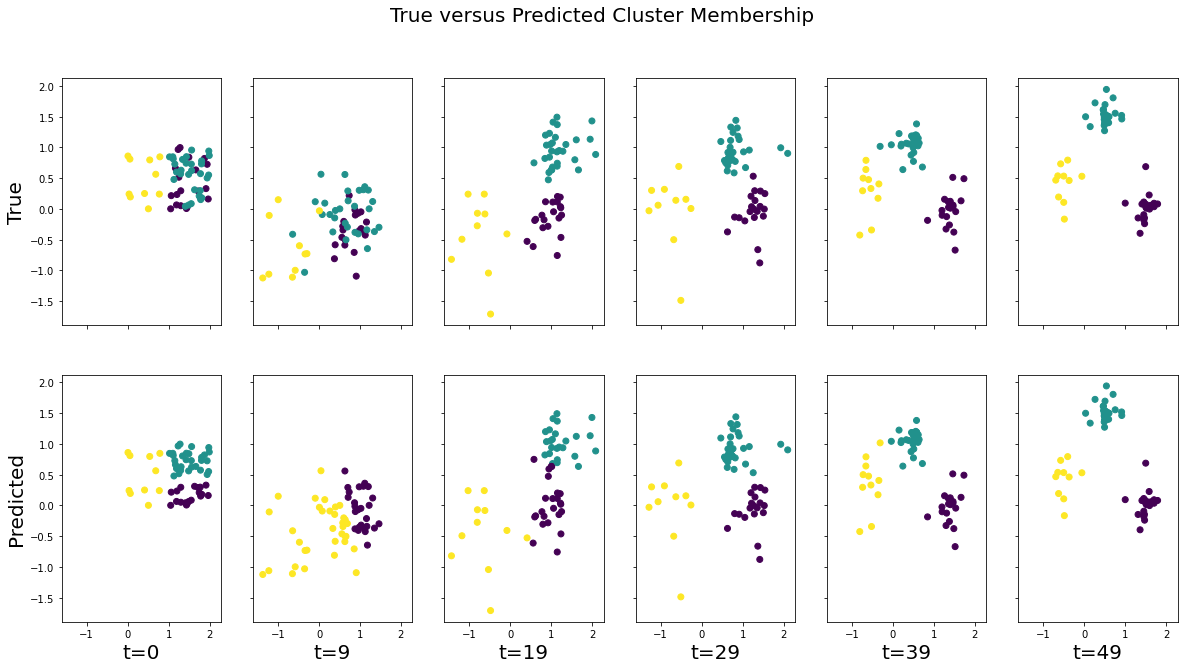

In [93]:
rows = [format(row) for row in ['True', 'Predicted']]
cols = ['t={}'.format(col) for col in [0,9,19,29,39,49]]


plt.figure()
fig, ((ax1, ax2, ax3, ax4, ax5, ax6), (ax7, ax8, ax9, ax10, ax11, ax12)) = plt.subplots(2, 6, figsize = [20,10],  sharex=True, sharey=True)
ax1.scatter(data[0,0,:], data[0,1,:], c = np.array(true_labels))
ax7.scatter(data[0,0,:], data[0,1,:], c = assignments2[:,0])

ax2.scatter(data[9,0,:], data[9,1,:], c = np.array(true_labels))
ax8.scatter(data[9,0,:], data[9,1,:], c = assignments2[:,9])

ax3.scatter(data[19,0,:], data[19,1,:], c = np.array(true_labels))
ax9.scatter(data[19,0,:], data[19,1,:], c = assignments2[:,19])

ax4.scatter(data[29,0,:], data[29,1,:], c = np.array(true_labels))
ax10.scatter(data[29,0,:], data[29,1,:], c = assignments2[:,29])

ax5.scatter(data[39,0,:], data[39,1,:], c = np.array(true_labels))
ax11.scatter(data[39,0,:], data[39,1,:], c = assignments2[:,39])

ax6.scatter(data[49,0,:], data[49,1,:], c = np.array(true_labels))
ax12.scatter(data[49,0,:], data[49,1,:], c = assignments2[:,49])


for ax, row in zip((ax1, ax7), rows):
    ax.set_ylabel(row, rotation=90, fontsize=20)
    
for ax, col in zip((ax7, ax8, ax9, ax10, ax11, ax12), cols):
    ax.set_xlabel(col, fontsize = 20)


plt.suptitle('True versus Predicted Cluster Membership', fontsize = 20)
plt.savefig('predictedclustering.eps', format='eps')

2022-02-11 08:25:36,757 - matplotlib.backends.backend_ps - WARNING - The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


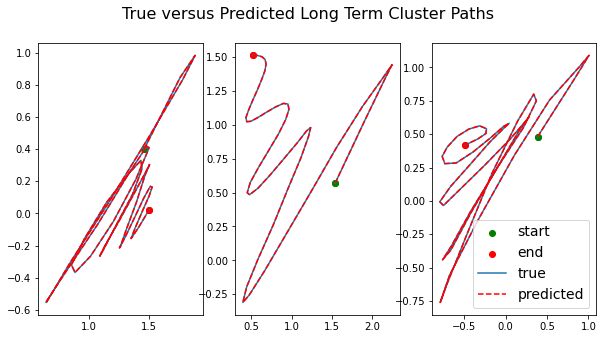

In [114]:
from TKM_long_term_clusters import *

criteria_mat = similarity_matrix(tkm.weights)

ltc = find_k_clusters(k=3, criteria_mat=criteria_mat, threshold_change=.05)



fig, axs = plt.subplots(1, 3, figsize = [10,5])
for i in range(3):
#     true_members = np.where(true_labels == i)
    swarm = BD.swarm_list[i][:50]
    swarm_mean = np.average(swarm, axis = 1)
    axs[i].scatter(swarm_mean[0,0], swarm_mean[0,1], c = 'g', label = 'start')
    axs[i].scatter(swarm_mean[-1,0], swarm_mean[-1,1], c = 'r', label = 'end')
    axs[i].plot(swarm_mean[:,0], swarm_mean[:,1], label = 'true')
    
    pred_members = ltc[i]
    pred_mean = np.average(data[:50,:, pred_members], axis = 2)
    axs[i].plot(pred_mean[:, 0], pred_mean[:,1], 'r--', label = 'predicted')
    axs[i].scatter(pred_mean[0,0], pred_mean[0,1], c = 'g')
    axs[i].scatter(pred_mean[-1,0], pred_mean[-1,1], c = 'r')
    

plt.legend(fontsize = 14)
plt.suptitle('True versus Predicted Long Term Cluster Paths', fontsize = 16)
plt.savefig('truevpredictedlongterm.eps', format='eps')

    

In [95]:
# np.save('pred_assingments', assignments2)
# np.save('true_labels', true_labels)
# np.save('fig_data', data)
# np.save('swarm_list', BD.swarm_list, allow_pickle = True)
# np.save('tkm_centers', tkm.centers)

# assingments2 = np.load('pred_assingments.npy')
# true_labels = np.load('true_labels.npy')
# data = np.load('fig_data.npy')
# # swarm_list = np.load('swarm_list.npy')
# centers = np.load('tkm_centers.npy')

# for i in range(true_labels):
#     members = np.where(true_labels == i)[0]
    

/opt/anaconda3/envs/tkm/lib/python3.9/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


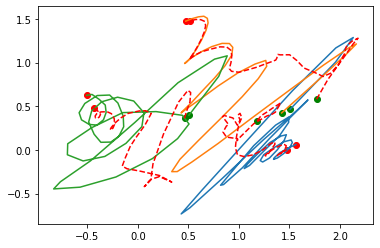

In [38]:
for i in range(3):
    swarm = BD.swarm_list[i][:50]
    swarm_mean = np.average(swarm, axis = 1)
    plt.scatter(swarm_mean[0,0], swarm_mean[0,1], c = 'g')
    plt.scatter(swarm_mean[-1,0], swarm_mean[-1,1], c = 'r')
    plt.plot(swarm_mean[:,0], swarm_mean[:,1], label = 'true paths')
    
plt.plot(tkm.centers[:, 0, 0], tkm.centers[:,1,0], 'r--', label = 'predicted paths')
plt.scatter(tkm.centers[0,0,0], tkm.centers[0,1,0], c = 'g', label = 'path start')
plt.scatter(tkm.centers[-1,0,0], tkm.centers[-1,1,0], c = 'r', label = 'path end')

plt.plot(tkm.centers[:, 0, 1], tkm.centers[:,1,1], 'r--')
plt.scatter(tkm.centers[0,0,1], tkm.centers[0,1,1], c = 'g')
plt.scatter(tkm.centers[-1,0,1], tkm.centers[-1,1,1], c = 'r')

plt.plot(tkm.centers[:, 0, 2], tkm.centers[:,1,2], 'r--')
plt.scatter(tkm.centers[0,0,2], tkm.centers[0,1,2], c = 'g')
plt.scatter(tkm.centers[-1,0,2], tkm.centers[-1,1,2], c = 'r')

# plt.legend()

2022-02-08 14:44:26,892 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


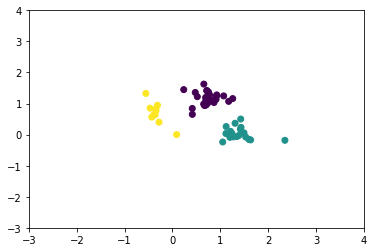

In [7]:
assignments = np.argmax(tkm.weights, axis = 2).T

from animate_path import animate_path 

animate_path(data[:50,:,:], assignments, anim_frames = 35, anim_interval = 100)



2022-02-08 14:48:07,234 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


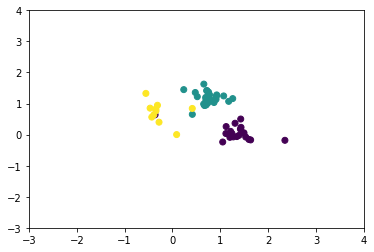

In [22]:
animate_path(data[:50,:,:], np.tile(true_labels, (50,1)).T, anim_frames = 35, anim_interval = 100)



In [11]:
football = pd.read_csv('tracking2018.csv')

In [12]:
football['time'].unique()

array(['2018-12-30T21:25:32.200', '2018-12-30T21:25:32.300',
       '2018-12-30T21:25:32.400', ..., '2018-09-11T05:25:18.000',
       '2018-09-11T05:25:18.100', '2018-09-11T05:25:18.200'], dtype=object)

In [13]:
football['date'] = pd.to_datetime(football['time']).dt.date
football['time'] = pd.to_datetime(football['time']).dt.time

In [14]:
football.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,date
0,21:25:32.200000,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right,2018-12-30
1,21:25:32.300000,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right,2018-12-30
2,21:25:32.400000,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right,2018-12-30
3,21:25:32.500000,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right,2018-12-30
4,21:25:32.600000,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right,2018-12-30


In [15]:
games = football['gameId'].unique()
single_game = football[football['gameId'] == games[0]]
single_game.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,date
0,21:25:32.200000,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right,2018-12-30
1,21:25:32.300000,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right,2018-12-30
2,21:25:32.400000,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right,2018-12-30
3,21:25:32.500000,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right,2018-12-30
4,21:25:32.600000,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right,2018-12-30


In [16]:
single_game['playId'].unique()

array([  36,  373,  392,  548,  564,  787,  803,  892, 1069, 1085, 1267,
       1538, 1557, 1976, 2165, 2314, 2351, 2502, 2554, 2570, 2860, 2883,
       2975, 3106, 3378, 3397, 3732, 3751, 4006, 4029, 4148])

In [37]:
import datetime
single_play = single_game[single_game['playId']==36]
single_play.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,date
0,21:25:32.200000,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right,2018-12-30
1,21:25:32.300000,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right,2018-12-30
2,21:25:32.400000,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right,2018-12-30
3,21:25:32.500000,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right,2018-12-30
4,21:25:32.600000,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right,2018-12-30


In [38]:
single_play.dropna(inplace=True)
single_play = single_play.sort_values(by=['time', 'nflId'])
single_play.head()

# for time in single_play['time'].unique():
#     single_play[single_play['time'] == time]

/opt/anaconda3/envs/tkm/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,date
0,21:25:32.200000,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right,2018-12-30
105,21:25:32.200000,62.04,14.23,0.07,0.52,0.00,272.98,325.00,None,40579.0,Ray-Ray Armstrong,52.0,OLB,away,1,2018123000,36,right,2018-12-30
210,21:25:32.200000,61.62,5.06,0.08,0.14,0.01,334.89,246.70,None,41316.0,Phillip Gaines,33.0,CB,away,1,2018123000,36,right,2018-12-30
315,21:25:32.200000,44.22,37.38,0.11,0.11,0.02,156.01,106.88,None,42398.0,Maxx Williams,87.0,TE,home,1,2018123000,36,right,2018-12-30
420,21:25:32.200000,43.83,42.43,0.15,0.17,0.02,104.41,84.56,None,42437.0,Ty Montgomery,88.0,RB,home,1,2018123000,36,right,2018-12-30


In [39]:
home = single_play[single_play['team'] == 'home']
away = single_play[single_play['team'] == 'away']

home_players = home['nflId'].nunique()
away_players = home['nflId'].nunique()

home_list = []
times = home['time'].unique()
for time in times:
    #positions in order by player
    home_list.append(home[home['time'] == time][['x', 'y']].to_numpy())

away_list = []
for time in away['time'].unique():
    #positions in order by player
    away_list.append(away[away['time'] == time][['x', 'y']].to_numpy())    

positions = [home_list, away_list]


2022-01-20 17:36:32,669 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


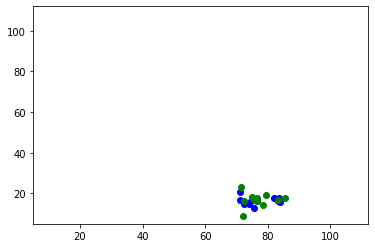

In [40]:
animate_path(positions, anim_frames = len(times), anim_interval = 100, colors = ['b', 'g', 'r'])

In [41]:
data = np.transpose(np.hstack((np.array(positions[0]), 
                                          np.array(positions[1]))), axes = [0,2,1])

t,m,n = data.shape

Iteration 100


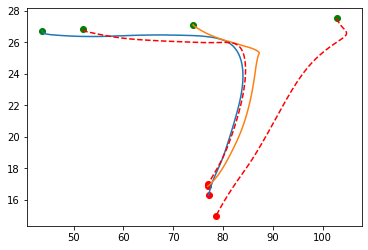

In [50]:
tkm = TKM(data)
# tkm.perform_clustering_center_derivative(k=2, lam = .80, gamma = 0, max_iter = 50000)
tkm.perform_clustering_constant_weights(k=2, lam = .80, max_iter = 5000)

plt.figure()
for i in range(2):
    swarm = np.array(positions[i])
    swarm_mean = np.average(swarm, axis = 1)
    plt.scatter(swarm_mean[0,0], swarm_mean[0,1], c = 'g')
    plt.scatter(swarm_mean[-1,0], swarm_mean[-1,1], c = 'r')
    plt.plot(swarm_mean[:,0], swarm_mean[:,1], label = 'true')
    
plt.plot(tkm.centers[:, 0, 0], tkm.centers[:,1,0], 'r--', label = 'predicted')
plt.scatter(tkm.centers[0,0,0], tkm.centers[0,1,0], c = 'g')
plt.scatter(tkm.centers[-1,0,0], tkm.centers[-1,1,0], c = 'r')

plt.plot(tkm.centers[:, 0, 1], tkm.centers[:,1,1], 'r--', label = 'predicted')
plt.scatter(tkm.centers[0,0,1], tkm.centers[0,1,1], c = 'g')
plt.scatter(tkm.centers[-1,0,1], tkm.centers[-1,1,1], c = 'r')



(22,)


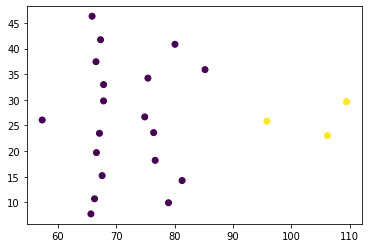

In [55]:
iteration = 40
assignment = np.where(tkm.weights == 0)[1]
print(assignment.shape)
plt.scatter(data[iteration,0,:], data[iteration,1,:], c = assignment)
plt.savefig('assignment_t10')

In [173]:
from SpectralFunctions import *

U = data[0,:,:]
m,n = U.shape

print(U.shape)

(2, 22)


In [194]:
A = AffinityMatrix(U, n, 5)
L = LaplacianMatrix(A)
X, eigvals = EigVecMatrix(L, 2)
normalX = Normalize(X)



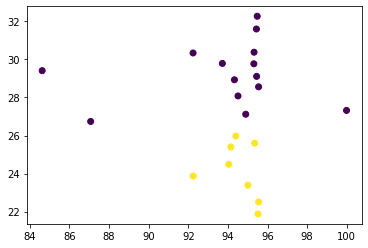

In [200]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=0).fit(normalX)

newX = normalX.T

plt.figure()
plt.scatter(U[0,:], U[1,:], c =kmeans.labels_)